FAO master dataset: # excluded from git

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
# Read the data
fao_data = pd.read_csv('D:/vscode/python/unbdh/data/raw/FAOMasterDataset.csv')

In [10]:
fao_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,87,E,Estimated value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,88,E,Estimated value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,91,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,92,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,92,E,Estimated value,NaN


In [11]:
fao_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140871 entries, 0 to 140870
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Domain Code       140871 non-null  object
 1   Domain            140871 non-null  object
 2   Area Code (M49)   140871 non-null  int64 
 3   Area              140871 non-null  object
 4   Element Code      140871 non-null  int64 
 5   Element           140871 non-null  object
 6   Item Code         140871 non-null  object
 7   Item              140871 non-null  object
 8   Year Code         140871 non-null  int64 
 9   Year              140871 non-null  object
 10  Unit              140871 non-null  object
 11  Value             120814 non-null  object
 12  Flag              140871 non-null  object
 13  Flag Description  140871 non-null  object
 14  Note              1084 non-null    object
dtypes: int64(3), object(12)
memory usage: 16.1+ MB


In [12]:
fao_data.describe()

,Area Code (M49),Element Code,Year Code
count,140871.000000,140871.000000,1.408710e+05
mean,426.200723,6126.292438,8.506580e+06
std,254.083843,9.521429,9.935825e+06
min,4.000000,6121.000000,2.000000e+03
25%,204.000000,6121.000000,2.009000e+03
50%,422.000000,6123.000000,2.018000e+03
75%,643.000000,6128.000000,2.010201e+07
max,894.000000,6173.000000,2.019202e+07


In [14]:
fao_data['Area'].value_counts()

Bangladesh                          779
Peru                                771
Mongolia                            767
United States of America            763
Democratic Republic of the Congo    762
                                   ... 
China, mainland                     493
New Caledonia                       487
French Polynesia                    487
China, Taiwan Province of           484
Tokelau                             466
Name: Area, Length: 204, dtype: int64

<AxesSubplot:>

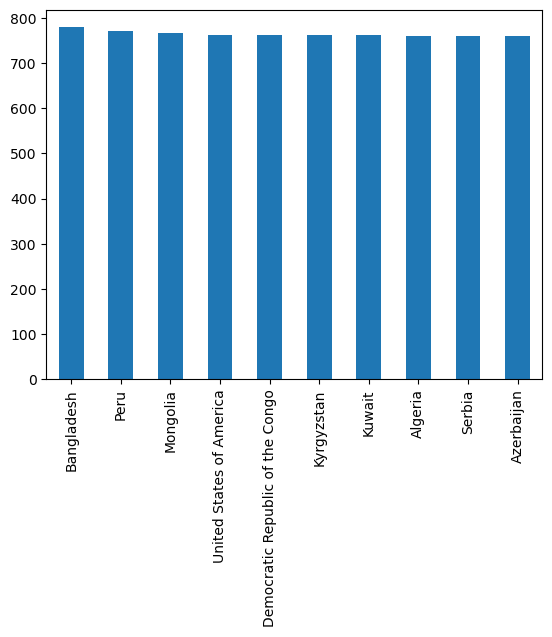

In [18]:
# Plot the top 10 countries with the highest number of observations
fao_data['Area'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

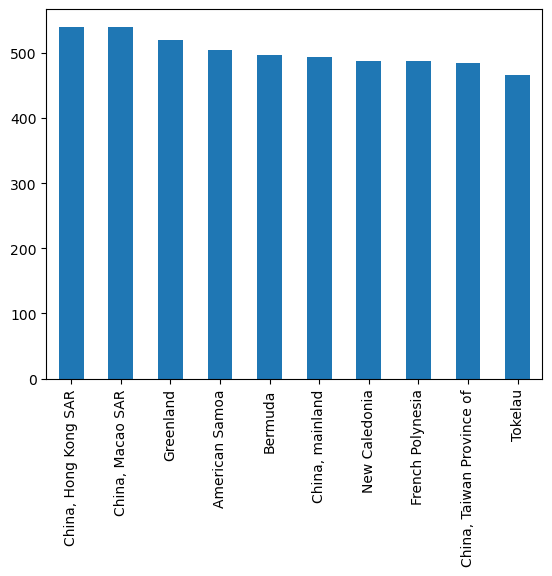

In [19]:
# Plot the top 10 countries with the lowest number of observations
fao_data['Area'].value_counts().tail(10).plot(kind='bar')

<AxesSubplot:>

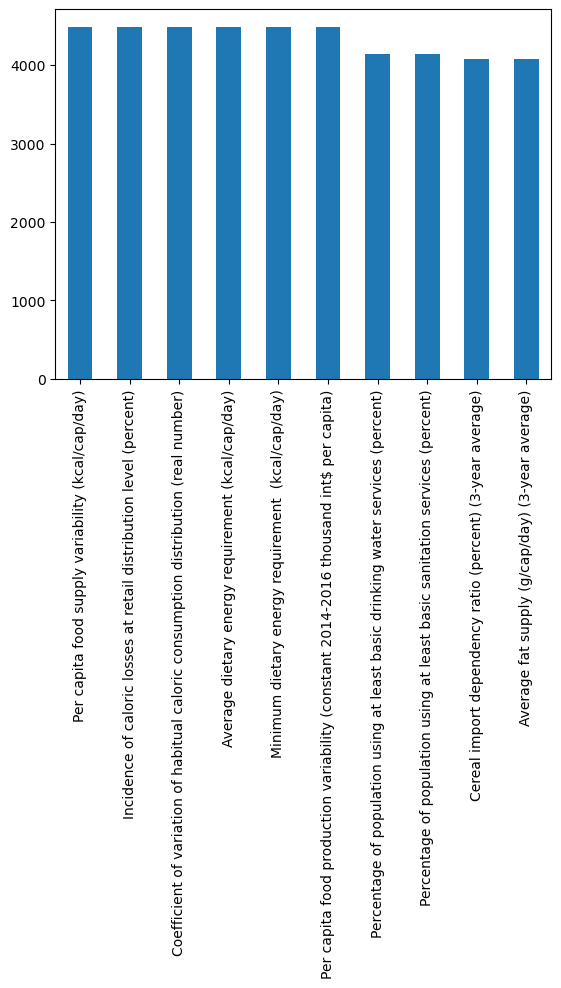

In [20]:
# Plot the top items 
fao_data['Item'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:xlabel='Item'>

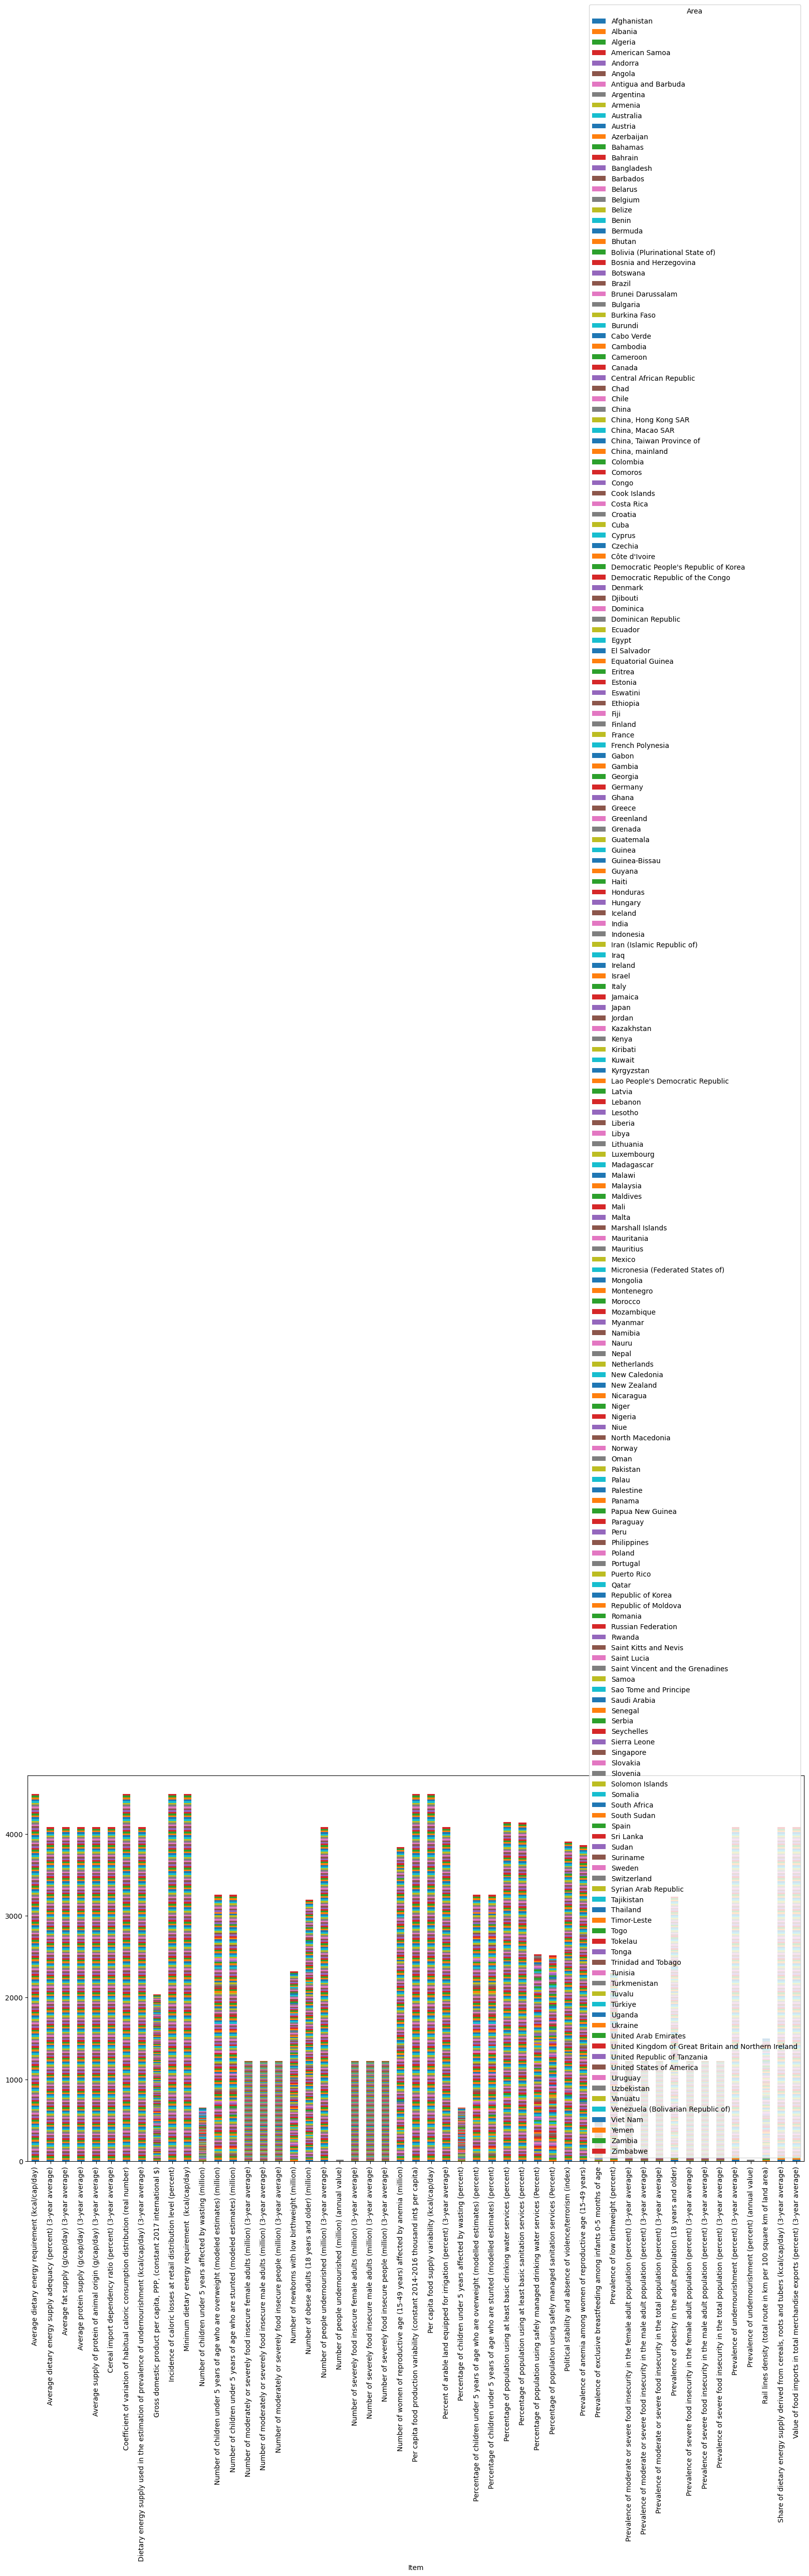

In [30]:
# plot item vs area
fao_data.groupby(['Item', 'Area']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))

<AxesSubplot:xlabel='Area'>

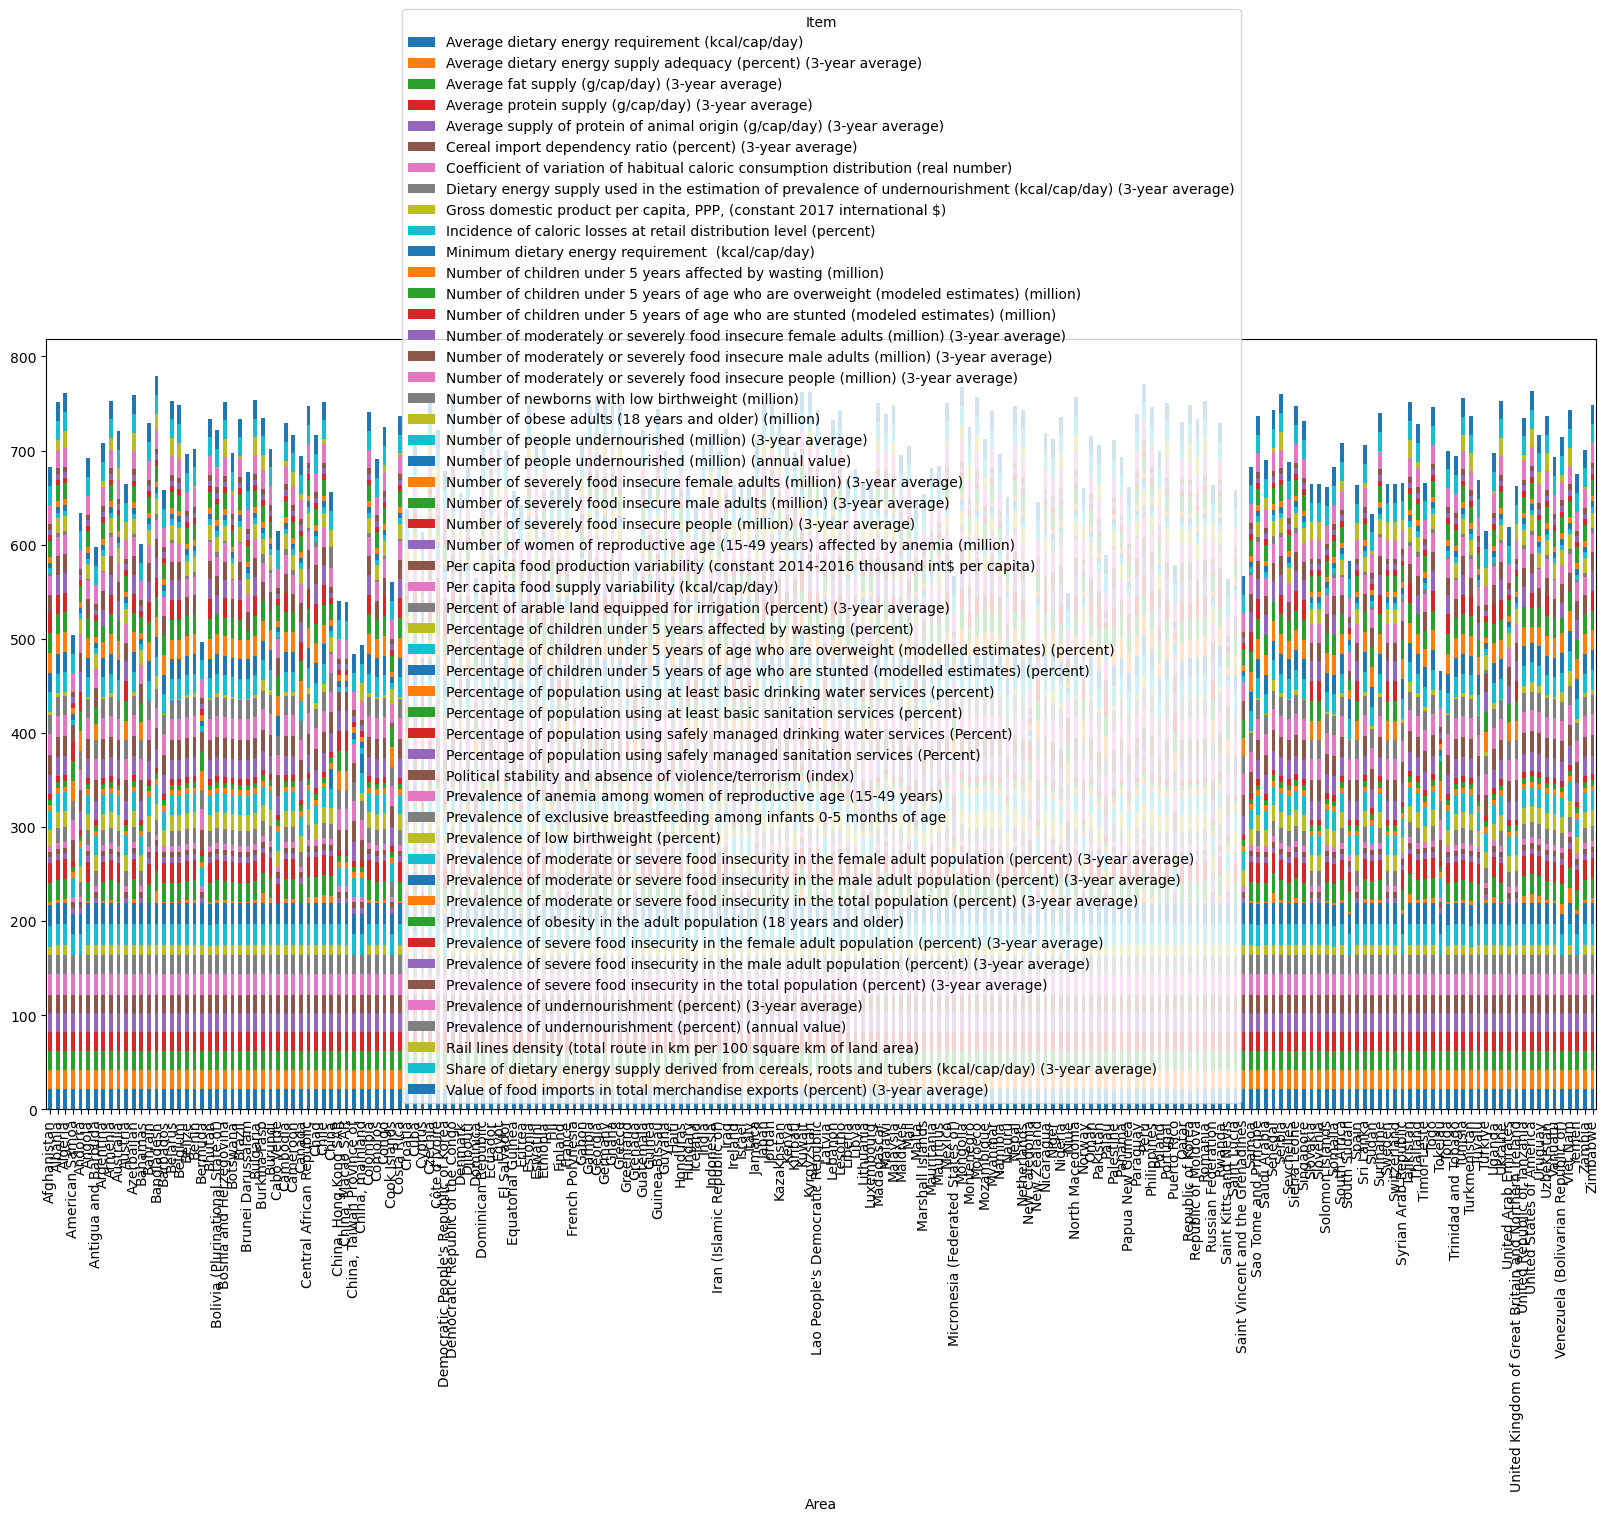

In [31]:
# how many items are there in each country
fao_data.groupby(['Area', 'Item']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))

In [33]:
# # Area vs item vs year and flag
# fao_data.groupby(['Area', 'Item', 'Year', 'Flag']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))

In [40]:
# missing data
fao_data.isnull().sum()

Domain Code              0
Domain                   0
Area Code (M49)          0
Area                     0
Element Code             0
Element                  0
Item Code                0
Item                     0
Year Code                0
Year                     0
Unit                     0
Value                20057
Flag                     0
Flag Description         0
Note                139787
dtype: int64

In [41]:
# # replace missing values
# fao_data['Value'].fillna(fao_data['Value'].mean(), inplace=True)
# # drop missing values
# fao_data.dropna(inplace=True)
# drop duplicates
fao_data.drop_duplicates(inplace=True)


In [42]:
# describe data
fao_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140871 entries, 0 to 140870
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Domain Code       140871 non-null  object
 1   Domain            140871 non-null  object
 2   Area Code (M49)   140871 non-null  int64 
 3   Area              140871 non-null  object
 4   Element Code      140871 non-null  int64 
 5   Element           140871 non-null  object
 6   Item Code         140871 non-null  object
 7   Item              140871 non-null  object
 8   Year Code         140871 non-null  int64 
 9   Year              140871 non-null  object
 10  Unit              140871 non-null  object
 11  Value             120814 non-null  object
 12  Flag              140871 non-null  object
 13  Flag Description  140871 non-null  object
 14  Note              1084 non-null    object
dtypes: int64(3), object(12)
memory usage: 17.2+ MB
